This notebook examines the impact of the mistake in the tidal ramping in the CIOPS-E .

Strategy:
1. Compute power spectrum.

Ideal strategy:
1. Remove tides
2. Compute residual current
3. Compute power spectrum

In [1]:
import datetime
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import xarray as xr

%matplotlib inline

In [2]:
data_dir='/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/'

# U power spectrum

In [3]:
files_U=glob.glob(os.path.join(data_dir, '*_000', '*grid_U*'))
files_U = [i for i in files_U if not ('201912' in i)]
files_U.sort()
du_2D = xr.open_mfdataset(files_U)

/home/soontiensn/miniconda/envs/tidal/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/home/soontiensn/miniconda/envs/tidal/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


In [4]:
restart_days = []
for f in files_U:
    d=os.path.basename(os.path.dirname(f))
    date=datetime.datetime.strptime(d.split('_')[0],'%Y%m%d%H')
    restart_days.append(date)
print(restart_days)

[datetime.datetime(2019, 5, 12, 0, 0), datetime.datetime(2019, 5, 19, 0, 0), datetime.datetime(2019, 5, 26, 0, 0), datetime.datetime(2019, 6, 2, 0, 0), datetime.datetime(2019, 6, 9, 0, 0), datetime.datetime(2019, 6, 16, 0, 0), datetime.datetime(2019, 6, 23, 0, 0), datetime.datetime(2019, 6, 30, 0, 0), datetime.datetime(2019, 7, 7, 0, 0), datetime.datetime(2019, 7, 14, 0, 0), datetime.datetime(2019, 7, 21, 0, 0), datetime.datetime(2019, 7, 28, 0, 0), datetime.datetime(2019, 8, 4, 0, 0), datetime.datetime(2019, 8, 11, 0, 0), datetime.datetime(2019, 8, 18, 0, 0), datetime.datetime(2019, 8, 25, 0, 0), datetime.datetime(2019, 9, 1, 0, 0), datetime.datetime(2019, 9, 8, 0, 0), datetime.datetime(2019, 9, 15, 0, 0), datetime.datetime(2019, 9, 22, 0, 0), datetime.datetime(2019, 9, 29, 0, 0), datetime.datetime(2019, 10, 6, 0, 0), datetime.datetime(2019, 10, 13, 0, 0), datetime.datetime(2019, 10, 20, 0, 0), datetime.datetime(2019, 10, 27, 0, 0), datetime.datetime(2019, 11, 3, 0, 0), datetime.datet

(1400, 850)
(800, 400)
(500, 600)
(100, 10)
(400, 750)


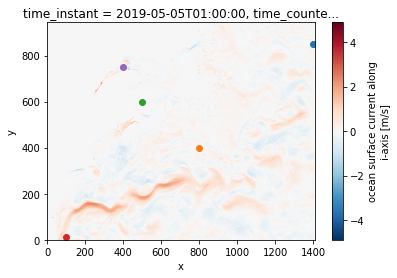

In [5]:
coords= [(1400, 850), (800,400), (500,600), (100,10), (400,750)]
n=len(coords)
colors=['C{}'.format(l) for l in range(n)]
fig,ax=plt.subplots(1,1)
du_2D.uos.isel(time_counter=0).plot(ax=ax)
for c, color in zip(coords, colors):
    print(c)
    ax.plot(c[0], c[1],'o',color=color)

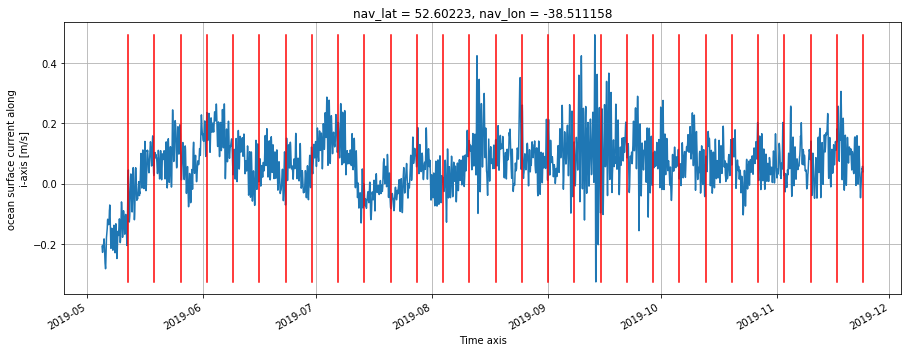

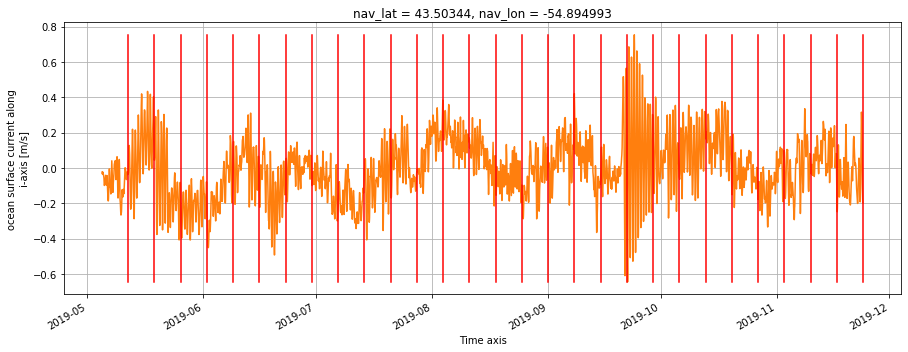

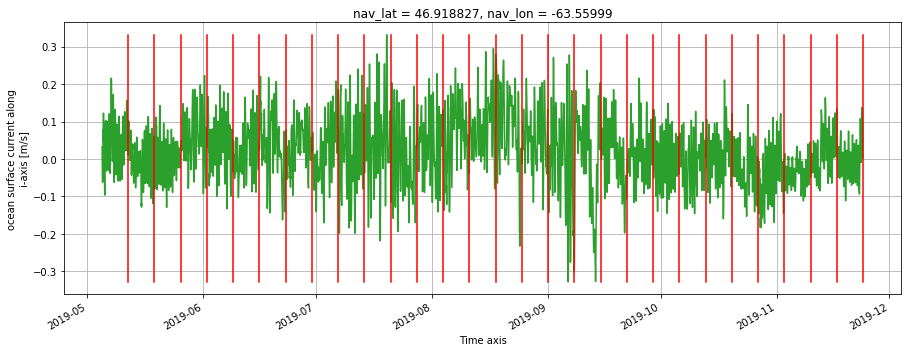

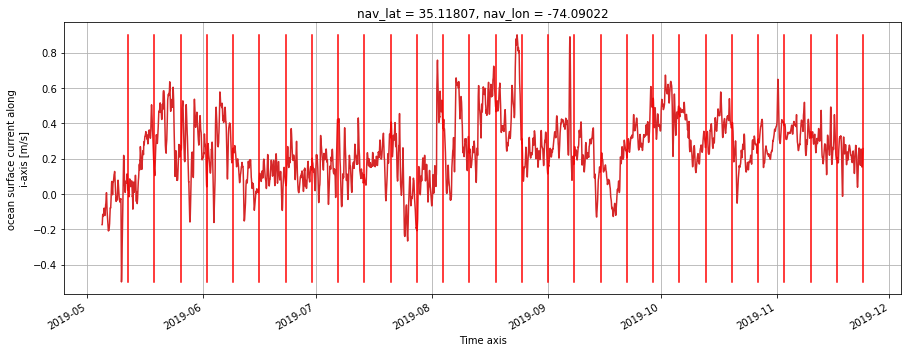

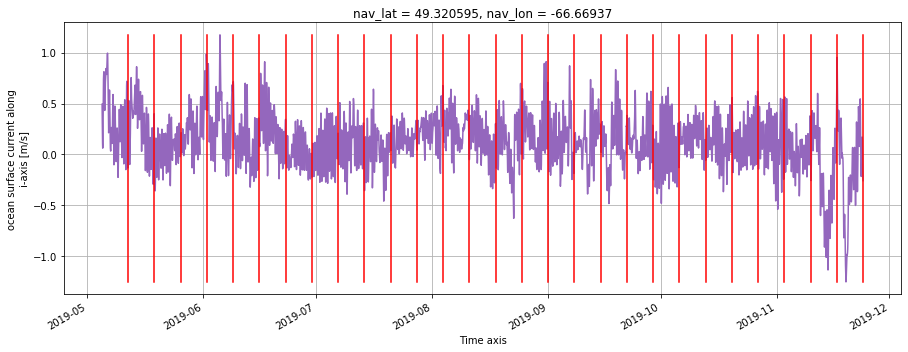

In [6]:
for c, color in zip(coords, colors):
    fig,ax=plt.subplots(1,1,figsize=(15,5))
    du_2D.uos.isel(x=c[0],y=c[1]).plot(ax=ax,color=color)
    minvar=du_2D.uos.isel(x=c[0],y=c[1]).min()
    maxvar=du_2D.uos.isel(x=c[0],y=c[1]).max()
    for d in restart_days:
        ax.plot([d,d], [minvar, maxvar], 'r-')
    ax.grid()

Text(0.5, 0, 'Frequency (1/hr)')

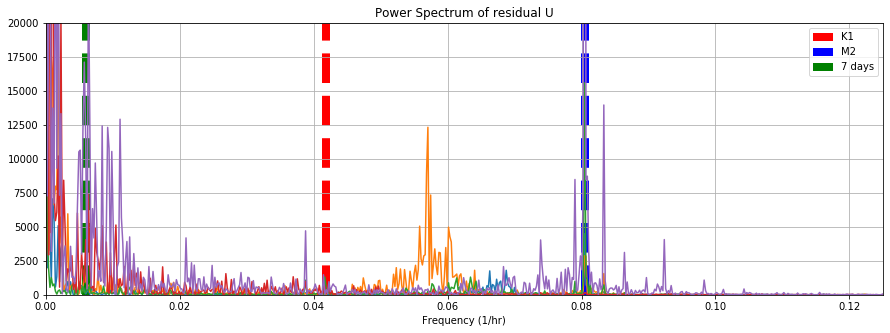

In [7]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
for c, color in zip(coords, colors):
    sig=du_2D.uos.isel(x=c[0],y=c[1]).values
    # power spectrum
    freqs = np.fft.fftfreq(sig.size, 1)
    idx = np.argsort(freqs)
    psd = np.abs(np.fft.fft(sig))**2
    ax.plot(freqs[idx], psd[idx], c=color, label='__nolegend__')
ax.set_title('Power Spectrum of residual U')
ax.grid()
m=20000
# K1
ax.plot([1/23.93, 1/23.93], [0,m], 'r--', lw=8,label='K1',zorder=0)
# M2
ax.plot([1/12.42, 1/12.42], [0,m], 'b--', lw=8, label='M2',zorder=0)
# 7 days
ax.plot([1/(7*24.), 1/(7*24.)], [0,m], 'g--', lw=8, label='7 days',zorder=0)
ax.legend()
ax.set_xlim([0,0.125])
ax.set_ylim([0,m])
ax.set_xlabel('Frequency (1/hr)')

# V power spectrum

In [8]:
files_V=glob.glob(os.path.join(data_dir, '*_000', '*grid_V*'))
files_V = [i for i in files_V if not ('201912' in i)]
files_V.sort()
dv_2D = xr.open_mfdataset(files_V)

/home/soontiensn/miniconda/envs/tidal/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/home/soontiensn/miniconda/envs/tidal/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


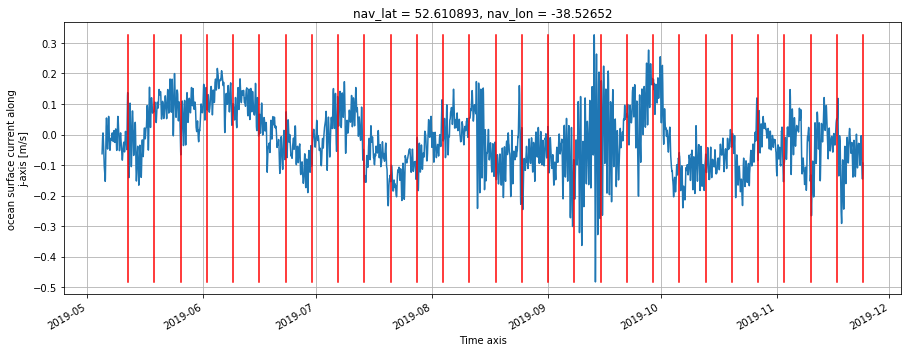

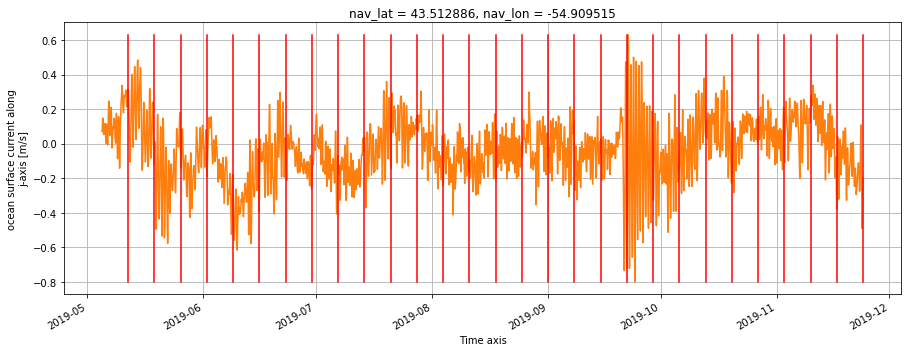

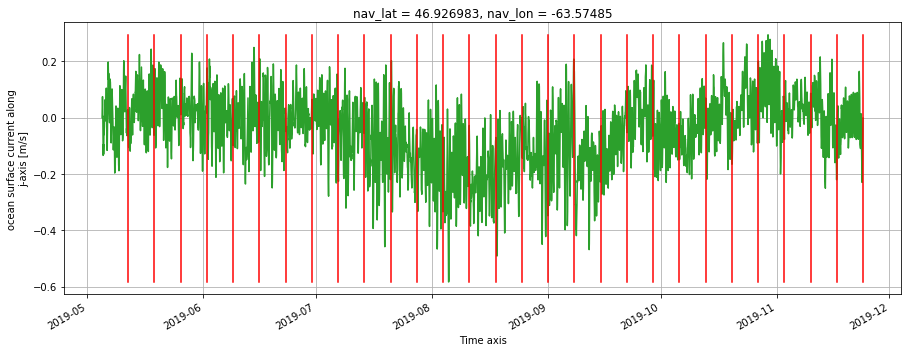

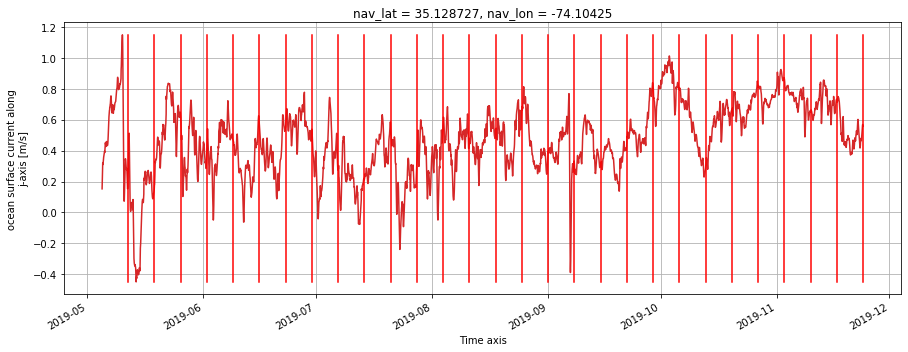

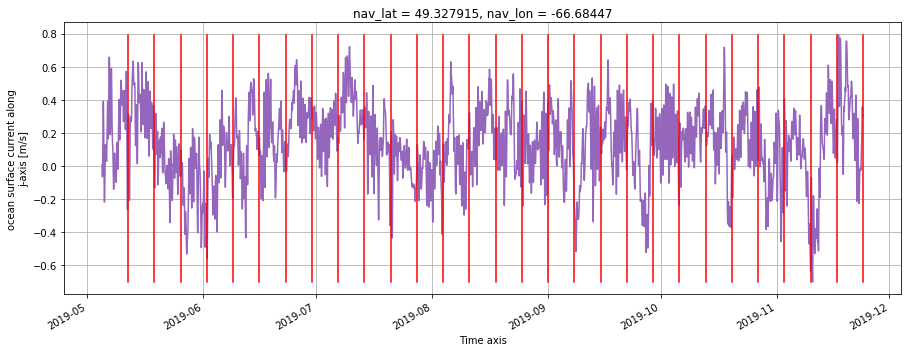

In [9]:
for c, color in zip(coords, colors):
    fig,ax=plt.subplots(1,1,figsize=(15,5))
    dv_2D.vos.isel(x=c[0],y=c[1]).plot(ax=ax,color=color)
    minvar=dv_2D.vos.isel(x=c[0],y=c[1]).min()
    maxvar=dv_2D.vos.isel(x=c[0],y=c[1]).max()
    for d in restart_days:
        ax.plot([d,d], [minvar, maxvar], 'r-')
    ax.grid()

Text(0.5, 0, 'Frequency (1/hr)')

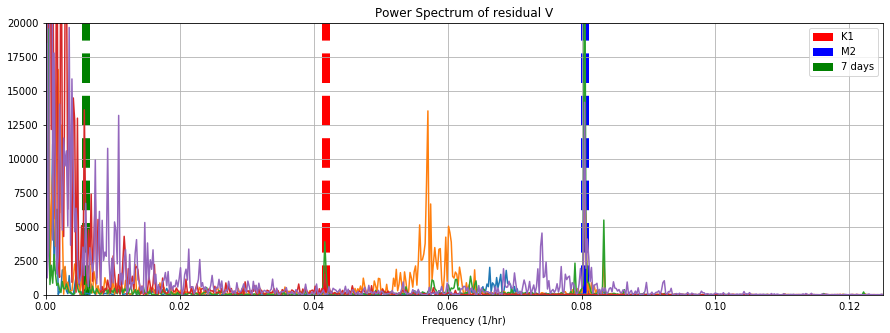

In [10]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
for c, color in zip(coords, colors):
    sig=dv_2D.vos.isel(x=c[0],y=c[1]).values
    # power spectrum
    freqs = np.fft.fftfreq(sig.size, 1)
    idx = np.argsort(freqs)
    psd = np.abs(np.fft.fft(sig))**2
    ax.plot(freqs[idx], psd[idx], c=color, label='__nolegend__')
ax.set_title('Power Spectrum of residual V')
ax.grid()
m=20000
# K1
ax.plot([1/23.93, 1/23.93], [0,m], 'r--', lw=8,label='K1',zorder=0)
# M2
ax.plot([1/12.42, 1/12.42], [0,m], 'b--', lw=8, label='M2',zorder=0)
# 7 days
ax.plot([1/(7*24.), 1/(7*24.)], [0,m], 'g--', lw=8, label='7 days',zorder=0)
ax.legend()
ax.set_xlim([0,0.125])
ax.set_ylim([0,m])
ax.set_xlabel('Frequency (1/hr)')

# SSH power spectrum

In [11]:
files_T=glob.glob(os.path.join(data_dir, '*_000', '*grid_T*'))
files_T = [i for i in files_T if not ('201912' in i)]
files_T.sort()
dt_2D = xr.open_mfdataset(files_T)

/home/soontiensn/miniconda/envs/tidal/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/home/soontiensn/miniconda/envs/tidal/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


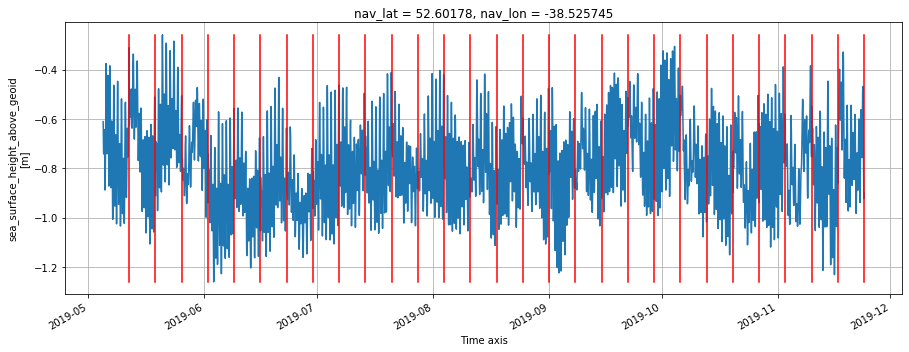

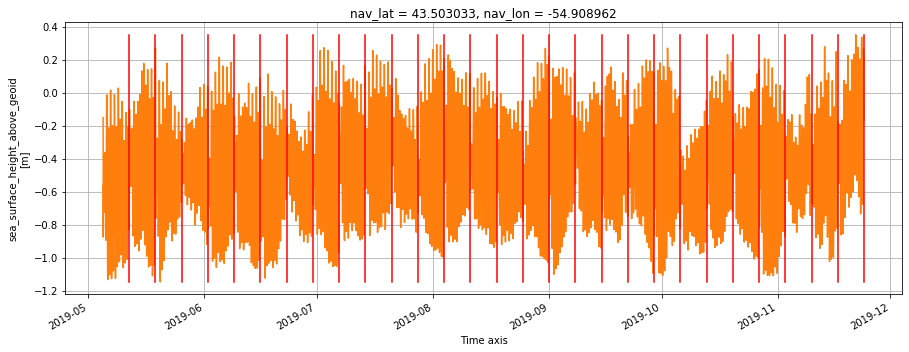

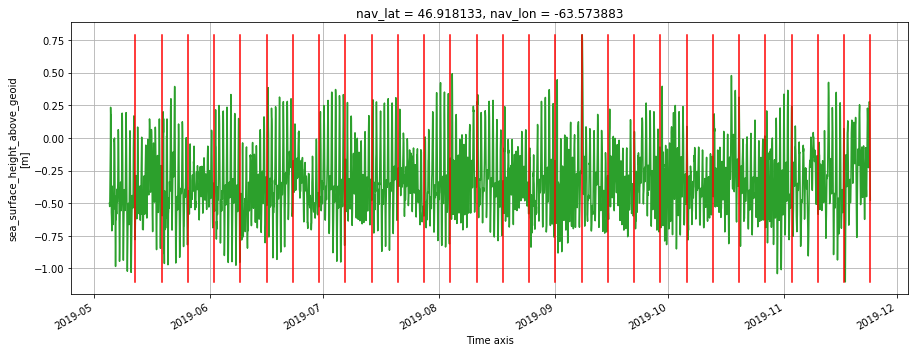

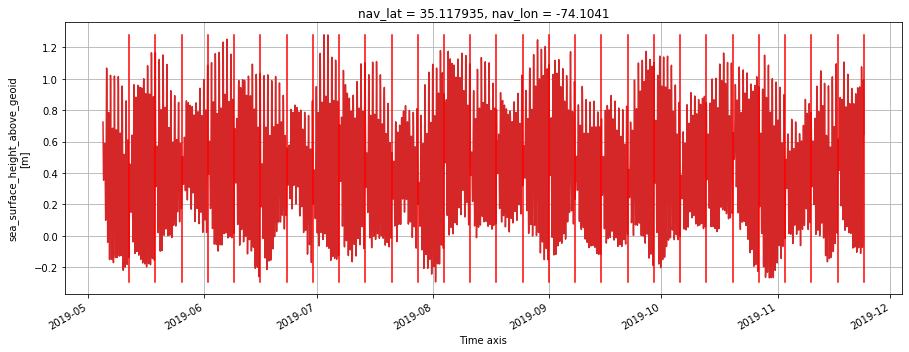

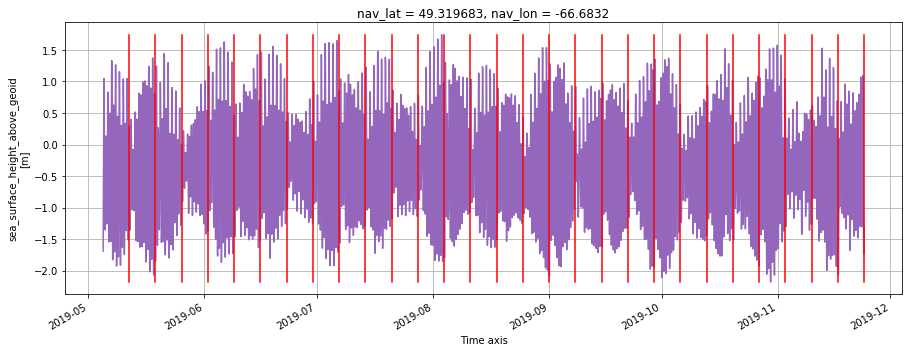

In [12]:
for c, color in zip(coords, colors):
    fig,ax=plt.subplots(1,1,figsize=(15,5))
    dt_2D.zos.isel(x=c[0],y=c[1]).plot(ax=ax,color=color)
    minvar=dt_2D.zos.isel(x=c[0],y=c[1]).min()
    maxvar=dt_2D.zos.isel(x=c[0],y=c[1]).max()
    for d in restart_days:
        ax.plot([d,d], [minvar, maxvar], 'r-')
    ax.grid()

Text(0.5, 0, 'Frequency (1/hr)')

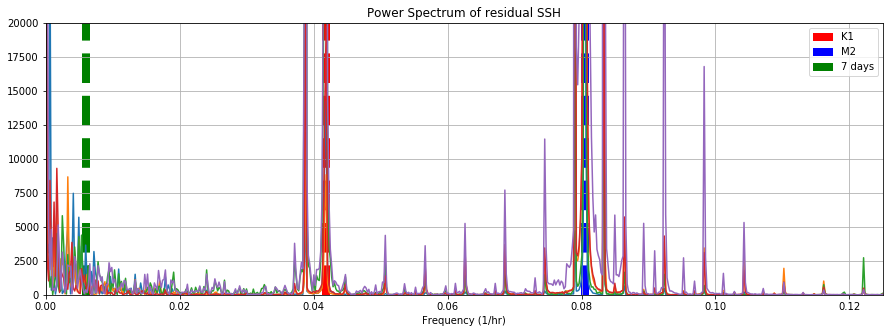

In [13]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
for c, color in zip(coords, colors):
    sig=dt_2D.zos.isel(x=c[0],y=c[1]).values
    # power spectrum
    freqs = np.fft.fftfreq(sig.size, 1)
    idx = np.argsort(freqs)
    psd = np.abs(np.fft.fft(sig))**2
    ax.plot(freqs[idx], psd[idx], c=color, label='__nolegend__')
ax.set_title('Power Spectrum of residual SSH')
ax.grid()
m=20000
# K1
ax.plot([1/23.93, 1/23.93], [0,m], 'r--', lw=8,label='K1',zorder=0)
# M2
ax.plot([1/12.42, 1/12.42], [0,m], 'b--', lw=8, label='M2',zorder=0)
# 7 days
ax.plot([1/(7*24.), 1/(7*24.)], [0,m], 'g--', lw=8, label='7 days',zorder=0)
ax.legend()
ax.set_xlim([0,0.125])
ax.set_ylim([0,m])
ax.set_xlabel('Frequency (1/hr)')